In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'

data1 = pd.read_csv('../raw/서울시 주민등록인구 (연령별구별) 통계_2019_Q4.csv')
data2 = pd.read_csv('../raw/지역사회건강조사 (전처리된 데이터)_2019/통합 테이블_2019.csv')
print(data1.columns)
print(data2.columns)

Index(['자치구', '주민등록인구', '10대 이하', '19-44', '45-64', '65-74', '70대 이상'], dtype='object')
Index(['지역', '연령별', '성별', '주관적 건강수준', '걷기 실천', '격렬한 신체활동 실천', '긍정적 태도율(자연환경)',
       '주관적 스트레스 수준', '우울감 경험률', '중등도 신체활동 실천', '체중조절 경험 여부', '행복감 지수'],
      dtype='object')


In [2]:
data2.rename(columns={'지역':'자치구'},inplace = True)
df = data2[data2['자치구'] == '서울시']
df = df[df['연령별'] != '계']
df = df[df['성별'] == '계']
df.set_index('자치구', inplace = True)

In [3]:
df

,연령별,성별,주관적 건강수준,걷기 실천,격렬한 신체활동 실천,긍정적 태도율(자연환경),주관적 스트레스 수준,우울감 경험률,중등도 신체활동 실천,체중조절 경험 여부,행복감 지수
자치구,,,,,,,,,,,
서울시,19~44,계,52.2,62.6,19.5,71.5,31.2,6.4,8.8,72.7,7.0
서울시,45~64,계,36.9,59.0,17.3,75.2,23.1,5.9,12.0,70.6,7.0
서울시,65~74,계,26.9,60.0,13.0,80.5,17.1,6.2,12.5,60.1,6.6
서울시,75 이상,계,20.3,50.7,5.9,85.2,17.2,7.4,7.8,39.5,6.9


In [4]:
df.reset_index(inplace = True)
df.columns

Index(['자치구', '연령별', '성별', '주관적 건강수준', '걷기 실천', '격렬한 신체활동 실천', '긍정적 태도율(자연환경)',
       '주관적 스트레스 수준', '우울감 경험률', '중등도 신체활동 실천', '체중조절 경험 여부', '행복감 지수'],
      dtype='object')

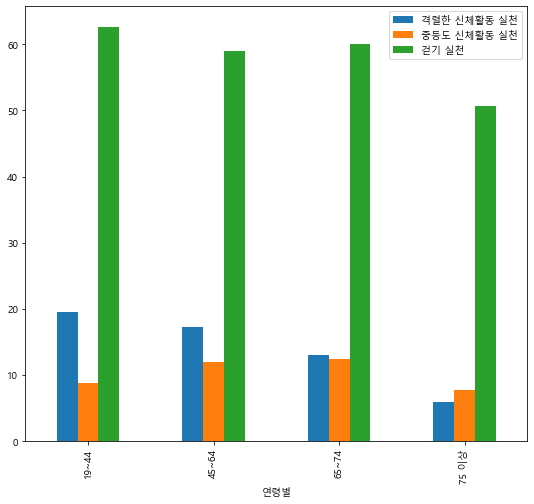

In [5]:
df.plot(x="연령별", y=["격렬한 신체활동 실천", "중등도 신체활동 실천", "걷기 실천"], kind="bar",figsize=(9,8))
plt.show()

In [6]:
data1.head()

,자치구,주민등록인구,10대 이하,19-44,45-64,65-74,70대 이상
0,서울시,10010983,1511483,3840945,3173283,883211,602061
1,종로구,161869,21277,61014,52059,14713,12806
2,중구,136488,15979,53831,43403,12915,10360
3,용산구,245185,33152,96832,76410,20719,18072
4,성동구,308979,44259,124318,96455,25425,18522


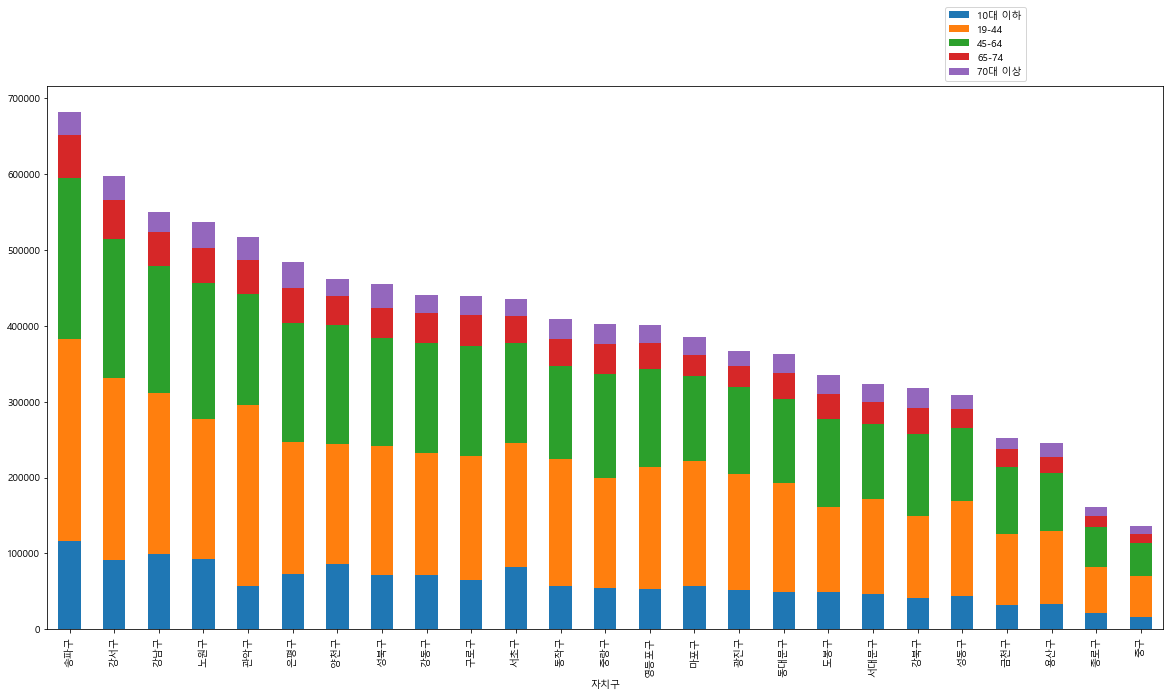

In [7]:
data1.sort_values(by = ['주민등록인구'],ascending=False, axis=0, inplace = True)
df2 = data1.drop(['주민등록인구'], axis='columns') 
df2 = df2[df2['자치구'] != '서울시']
df2.set_index('자치구',inplace=True)
df2.plot(kind="bar",stacked=True,figsize=(20,10))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

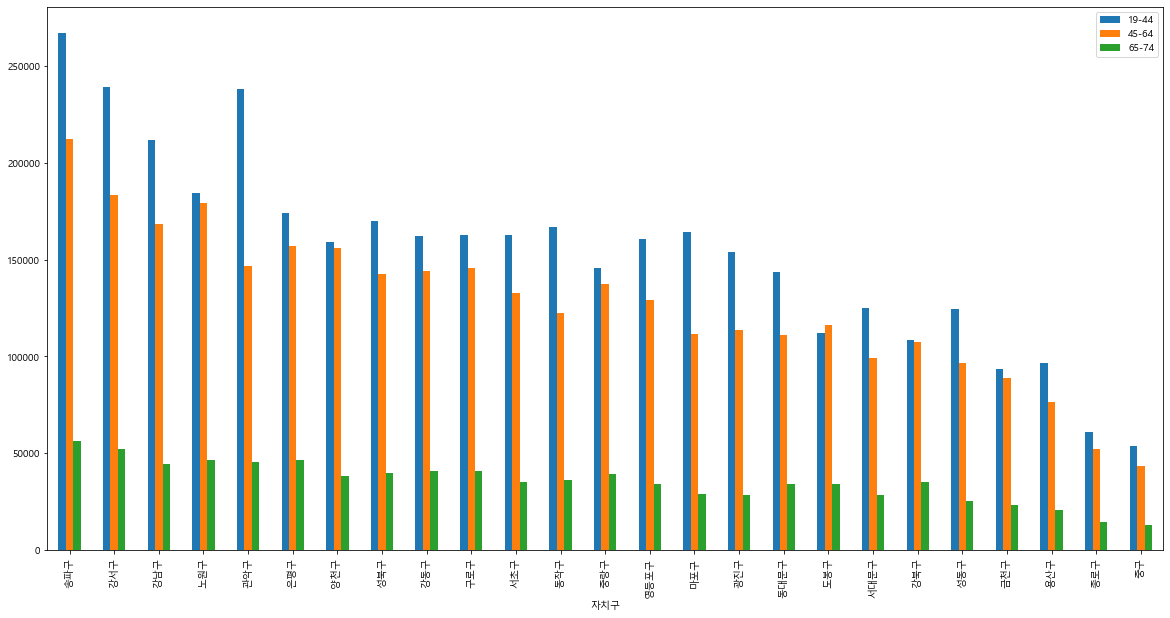

In [8]:
df2.reset_index(inplace = True)
df2.plot(x="자치구", y=["19-44", "45-64", "65-74"], kind="bar",figsize=(20,10))
plt.show()

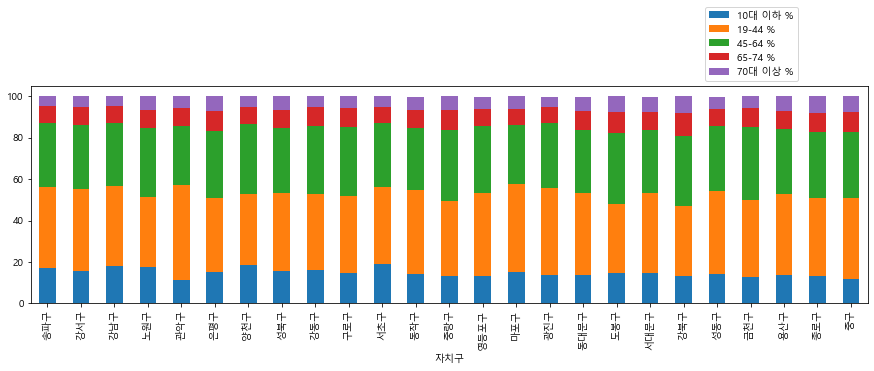

In [9]:
data1['10대 이하 %'] = round(data1['10대 이하']/data1['주민등록인구']*100,1)
data1['19-44 %'] = round(data1['19-44']/data1['주민등록인구']*100,1)
data1['45-64 %'] = round(data1['45-64']/data1['주민등록인구']*100,1)
data1['65-74 %'] = round(data1['65-74']/data1['주민등록인구']*100,1)
data1['70대 이상 %'] = round(data1['70대 이상']/data1['주민등록인구']*100,1)

cols = data1.columns
df3 = data1.drop(cols[1:7],axis=1) 
df3 = df3[df3['자치구'] != '서울시']
df3.set_index('자치구',inplace=True)
df3.plot(kind="bar",stacked=True,figsize=(15,4))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()